<a href="https://colab.research.google.com/github/PedroDS4/Supervised_Machine_Learning/blob/main/Linear_Regression_Frequency_identification_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Estimação de Frequência de Senoides**
Seja $x(t) = sen(2 \pi f t) $ um sinal senoidal de frequência $f$, sua versão amostrada é dada por

$$
x[n] = x(nT_s) = sen(2 \pi f n T_s)
$$

a partir desse sinal, como podemos identificar a frequência utilizando redes neurais?

Se a entrada da rede são as amostras, temos que, a saída será dada por

$$
z = \sum_{i = 0}^{N} w_i x[i]
$$

considerando uma senoide de $N$ amostras, e então podemos treinar a rede para minimizar o erro

$$
J(\mathbf{w}) = ||\mathbf{f} - \mathbf{X}\mathbf{w}||_2^2  
$$

O ponto de mínimo desas função objetivo é

$$
\mathbf{w}^* = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{f}
$$



##**Gerando o dataset**

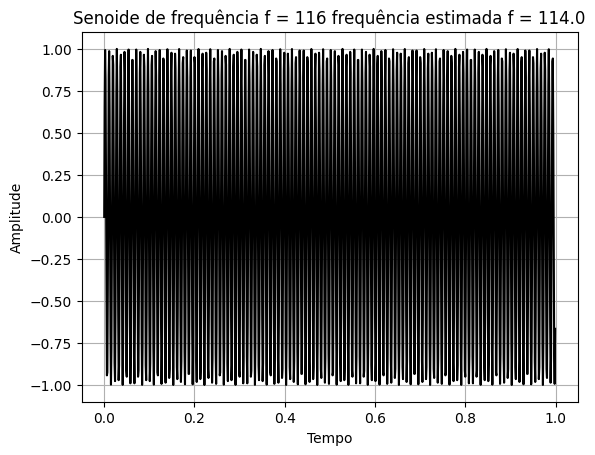

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#Número de senoides/frequencia
M = 10000

#Número de amostras no tempo
N = 1000

#Matriz de senoides(cada linha é uma senoide)
sen_matrix = np.zeros((M,N))


#Vetor de frequências verdadeiras
f = np.random.choice(np.arange(1,240),size = M)

T_s = 1e-3

t = np.arange(N)*T_s

for i in range(M):
  sen_matrix[i,:] = np.sin(2*np.pi*f[i]*t)



# w = np.linalg.inv(sen_matrix.T@sen_matrix)@sen_matrix.T@f
w = np.linalg.pinv(sen_matrix)@f

sen = sen_matrix[1,:]

freq = w.T@sen

freq = np.floor(freq)

plt.plot(t,sen,'black')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title(f'Senoide de frequência f = {f[1]} frequência estimada f = {freq}')
plt.grid()




##**Validação**

Frequência estimada: 100.0


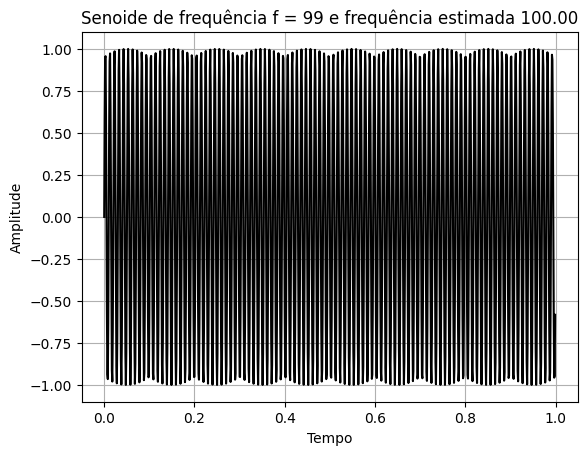

In [ ]:

f = 99
sen_test = np.sin(2*np.pi*f*t)

f_est = w.T@sen_test
f_est = np.floor(f_est)
print(f'Frequência estimada: {f_est}')

plt.plot(t,sen_test,'black')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title(f'Senoide de frequência f = {f} e frequência estimada {f_est:.2f}')
plt.grid()


##**Testando a variação de frequência**


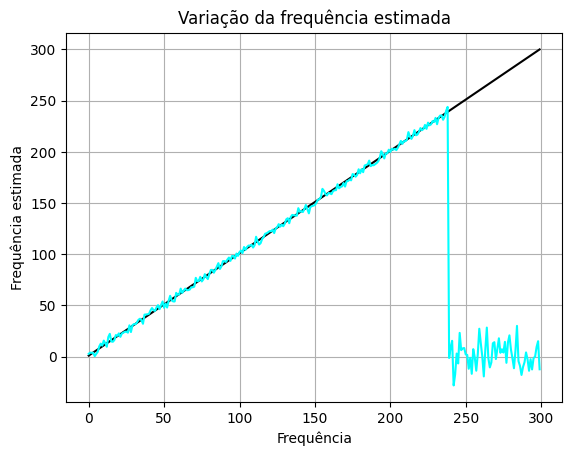

In [ ]:
test_freqs = np.linspace(1,300,300)

test_senoides = np.zeros((300,1000))

for i in range(300):
  test_senoides[i,:] = np.sin(2*np.pi*test_freqs[i]*t)

f_est = test_senoides@w



plt.plot(test_freqs,'black')
plt.plot(f_est,'cyan')
plt.xlabel('Frequência')
plt.ylabel('Frequência estimada')
plt.title('Variação da frequência estimada')
plt.grid()